In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [329]:
nobel = pd.read_csv('nobel.csv')

In [334]:
nobel['sex'].value_counts('Male').idxmax()

'Male'

In [342]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = nobel['year'].apply(lambda x: (x//10)*10)
usa_proportion_per_decade = nobel.groupby('decade',as_index=False)['usa_born_winner'].mean()
usa_proportion_per_decade

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


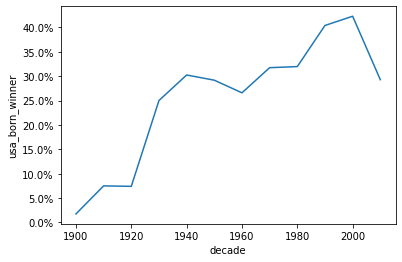

In [337]:
us_plot = sns.lineplot(x = 'decade', y = 'usa_born_winner', data = usa_proportion_per_decade).yaxis.set_major_formatter(PercentFormatter(1.0))

In [338]:
nobel['female_winner'] = nobel['sex'] == 'Female'
female_proportion = nobel.groupby(['decade','category'],as_index = False)['female_winner'].mean()

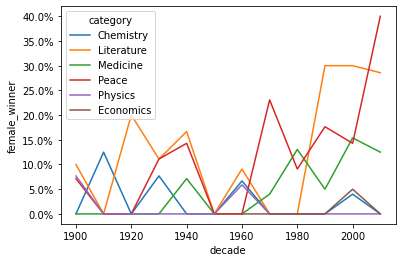

In [339]:
f_plot_category = sns.lineplot(x = 'decade', y = 'female_winner', data = female_proportion, hue='category').yaxis.set_major_formatter(PercentFormatter(1.0))


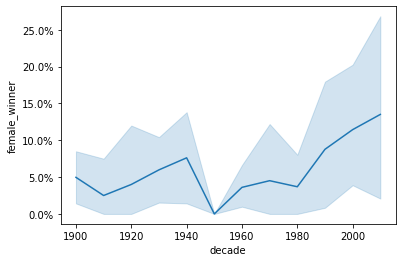

In [340]:
f_plot = sns.lineplot(x = 'decade', y = 'female_winner', data = female_proportion).yaxis.set_major_formatter(PercentFormatter(1.0))

In [341]:
nobel[nobel['sex'] == 'Female'].sort_values('year').iloc[0].full_name

'Marie Curie, née Sklodowska'

In [344]:
winners = (nobel[nobel.duplicated(['full_name'])])
winners.drop_duplicates(subset = ["full_name"], inplace=True)
winners

c:\users\omen\appdata\local\programs\python\python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,year,category,prize,laureate_type,full_name,birth_date,birth_country,sex,usa_born_winner,decade,female_winner
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,Individual,"Marie Curie, née Sklodowska",1867-11-07,Russian Empire (Poland),Female,False,1910,True
215,1944,Peace,The Nobel Peace Prize 1944,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,False,1940,False
340,1962,Peace,The Nobel Peace Prize 1962,Individual,Linus Carl Pauling,1901-02-28,United States of America,Male,True,1960,False
424,1972,Physics,The Nobel Prize in Physics 1972,Individual,John Bardeen,1908-05-23,United States of America,Male,True,1970,False
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,Individual,Frederick Sanger,1918-08-13,United Kingdom,Male,False,1980,False
523,1981,Peace,The Nobel Peace Prize 1981,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,False,1980,False


In [346]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['age'] = nobel["year"] - nobel["birth_date"].dt.year
nobel[nobel['sex'] == 'Female'].sort_values('age').iloc[0].full_name

'Malala Yousafzai'